In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

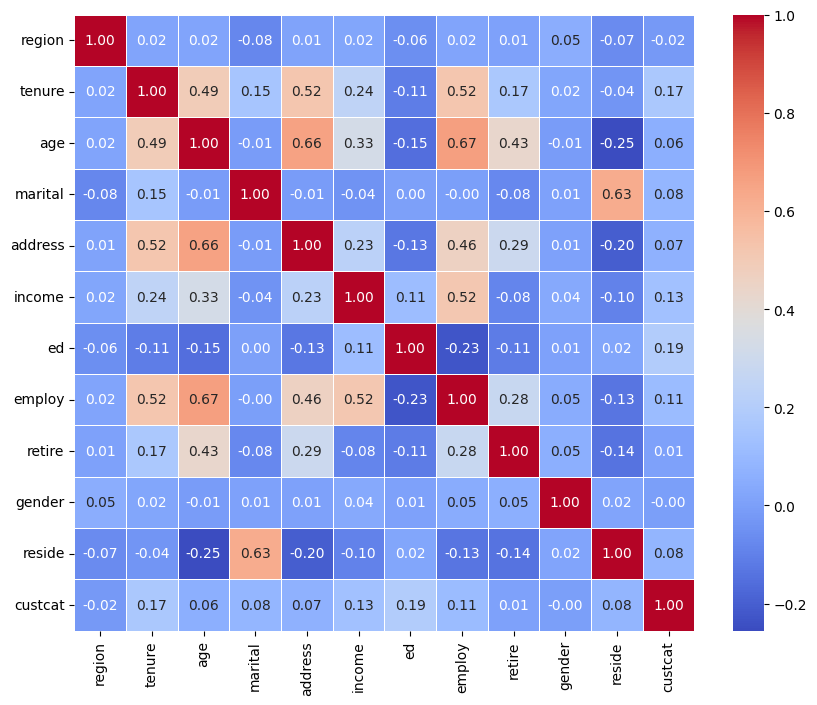

In [4]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [5]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [6]:
x = df.drop('custcat',axis=1)
y = df['custcat']



In [7]:
x_norm = StandardScaler().fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=4)

## KNN Classification


### Training


In [9]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn_model = knn.fit(x_train, y_train)

### Predicting

In [10]:
y_hat = knn_model.predict(x_test)

### Accuracy evaluation


In [11]:
print("Test set accuracy:",accuracy_score(y_test, y_hat))

Test set accuracy: 0.32


### Exercise 1
Can you build the model again, but this time with k=6?


In [12]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn_model = knn.fit(x_train, y_train)
y_hat = knn_model.predict(x_test)
print('Test set accuracy:', accuracy_score(y_test, y_hat))

Test set accuracy: 0.31


### Choosing the correct value of k


In [13]:
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat = knn_model_n.predict(x_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

### Plot the model accuracy for a different number of neighbors.


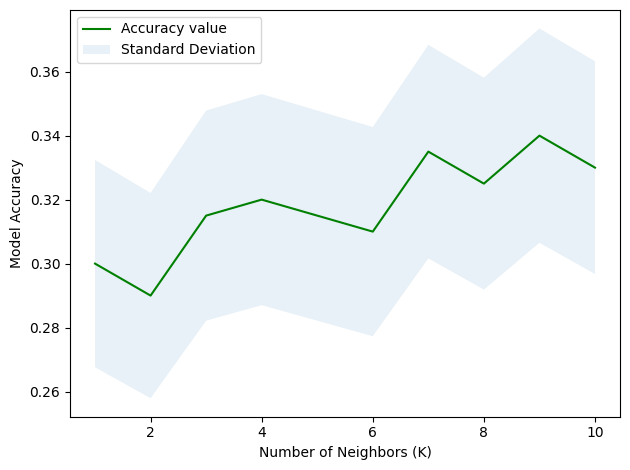

In [14]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)'
plt.tight_layout()
plt.show()

In [15]:
print( "The best accuracy was with", acc.max(), "with k =", acc.argmax()+1) 

The best accuracy was with 0.34 with k = 9


### Exercise 2
Run the training model for 30 values of k and then again for 100 values of k. Identify the value of k that best suits this data and the accuracy on the test set for this model.


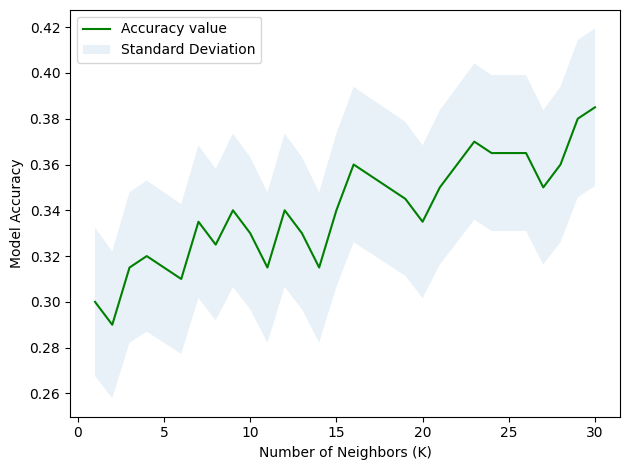

In [19]:
ks = 30 
acc = np.zeros((ks))
std_acc = np.zeros((ks))
for n in range (1, ks+1):
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = knn.predict(x_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(y_test == yhat)/np.sqrt(yhat.shape[0])
plt.plot(range(1,ks+1),acc, 'g')
plt.fill_between(range(1, ks+1), acc-1*std_acc, acc+1*std_acc, alpha = 0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [20]:
print("The best accuracy was with", acc.max(), "with k ", acc.argmax()+1)

The best accuracy was with 0.385 with k  30


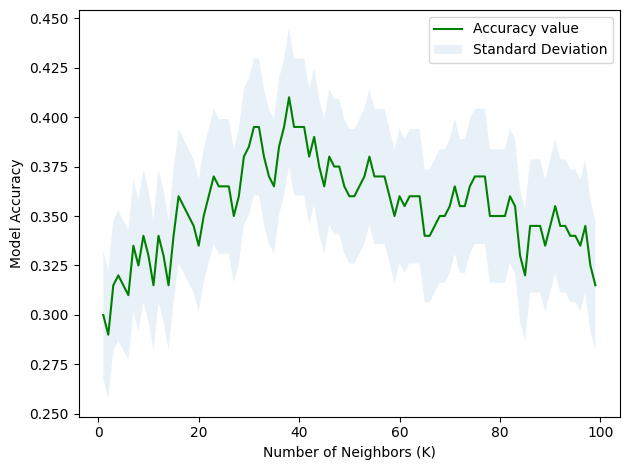

In [26]:
ks = 100 
acc = np.zeros((ks -1 ))
std_acc = np.zeros((ks-1))
for n in range (1, ks):
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = knn.predict(x_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(y_test == yhat)/np.sqrt(yhat.shape[0])
plt.plot(range(1,ks),acc, 'g')
plt.fill_between(range(1, ks), acc-1*std_acc, acc+1*std_acc, alpha = 0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print("The best accuracy was with", acc.max(), "with k ", acc.argmax()+1)

The best accuracy was with 0.41 with k  38
